In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import joblib

import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'joblib'

In [7]:
from utils import clean_text

### Loading twitter Dataset

In [5]:
twitter = pd.read_csv("tweets.csv")
twitter.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


### Checking for the shape of the data set

In [6]:
twitter.shape

(27481, 4)

### Checking for missing values

In [8]:
twitter.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64




### Replacing the missing values with the median values

In [9]:
tweet = twitter.dropna()

In [10]:
tweet.isna().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

### getting the length of the sentence 

In [11]:
tweet["length"] = tweet['text'].apply(lambda X: len(str(X).split(' ')))

### making the sentiment into a positive and negative sentimwnt

In [12]:
tweet['sentiment_review'] = tweet['sentiment'].map({'positive':'positive', 'neutral':'positive', 'negative':'negative'})

In [13]:
tweet

,textID,text,selected_text,sentiment,length,sentiment_review
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,8,positive
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,11,negative
2,088c60f138,my boss is bullying me...,bullying me,negative,5,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative,6,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,15,negative
...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,18,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,26,negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,24,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,8,positive


### Distribution of words

<BarContainer object of 39 artists>

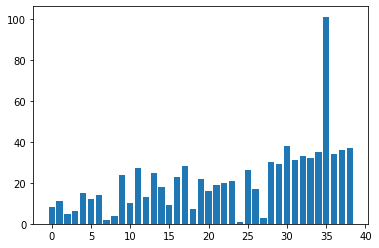

In [14]:
unique_lengths = tweet['length'].unique()
plt.bar(np.arange(len(unique_lengths)), unique_lengths)A

### Droping off textID, sentiment

In [15]:
columns = ['textID', 'sentiment']
tweet.drop(columns, inplace=True, axis=1)

In [16]:
tweet

,text,selected_text,length,sentiment_review
0,"I`d have responded, if I were going","I`d have responded, if I were going",8,positive
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,11,negative
2,my boss is bullying me...,bullying me,5,negative
3,what interview! leave me alone,leave me alone,6,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",15,negative
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,18,negative
27477,I`ve wondered about rake to. The client has ...,", don`t force",26,negative
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,24,positive
27479,But it was worth it ****.,But it was worth it ****.,8,positive


### checking the value of sentiments

In [17]:
print(tweet['sentiment_review'].value_counts())

positive    19699
negative     7781
Name: sentiment_review, dtype: int64


### Checking for unique sentence in each doucment

In [18]:
tweet['selected_text'].unique()

array(['I`d have responded, if I were going', 'Sooo SAD', 'bullying me',
       ..., 'Yay good for both of you.', 'But it was worth it  ****.',
       'All this flirting going on - The ATG smiles. Yay.  ((hugs)'],
      dtype=object)

### Getting the arrays of the words

In [19]:
tweet['length'].unique()

array([  8,  11,   5,   6,  15,  12,  14,   2,   4,  24,  10,  27,  13,
        25,  18,   9,  23,  28,   7,  22,  16,  19,  20,  21,   1,  26,
        17,   3,  30,  29,  38,  31,  33,  32,  35, 101,  34,  36,  37])

### Plot of each sentiment

positive    19699
negative     7781
Name: sentiment_review, dtype: int64



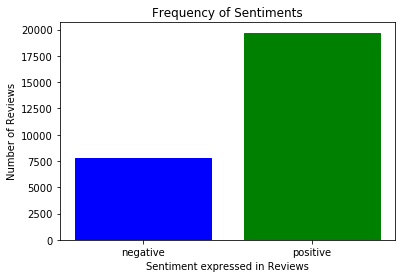

In [20]:
Index = [1, 0]

print(tweet["sentiment_review"].value_counts())
print()

barlist = plt.bar(Index, tweet["sentiment_review"].value_counts())

plt.title("Frequency of Sentiments")
plt.xticks(Index, ['positive', 'negative'])
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')

barlist[Index[1]].set_color('green')
barlist[Index[0]].set_color('blue')
# barlist[Index[0]].set_color('red')
plt.show()

### Application of clean text function for cleaning the document 

In [21]:
tweet['select_text'] = tweet['selected_text'].apply(clean_text)

### Balancing of dataset

In [44]:
# min_size = ((tweet['sentiment_review'] == 0).sum(), (tweet['sentiment_review'] == 1).sum())

# tweet = pd.concat([
#     tweet.loc[tweet[tweet['sentiment_review'] == 'negative'].index[:min_size]]
#     tweet.loc[tweet[tweet['sentiment_review'] == 'positive'].index[:min_size]]
#     tweet.loc[tweet[tweet['sentiment_review'] == 'positive'].index[:min_size]]
# ])

# tweet.head()

In [24]:
# axis.tweet['sentiment'].value_counts(sort = False).plot(kind = "barl")
# axis.set_Xlabels("Description of labels")
# axis.set_ylabels("sentiment")

### Visualizing the most frequent words used in the review

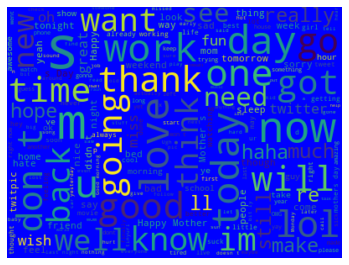

In [25]:
word = " ".join([text for text in tweet['text']])

rainy_word = WordCloud(width = 400, height = 300, random_state = 90, max_font_size = 70, background_color = "blue").generate(word)

plt.figure(figsize = (6, 12))
plt.imshow(rainy_word, interpolation = "bilinear")
plt.axis('off')
plt.show()

### Split tweets into dependent(y) and independent variable(X)

In [26]:
X = tweet['selected_text']
y = tweet['sentiment_review']

In [27]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 90)

In [28]:
X_train.shape

(19236,)

In [29]:
y_train.shape

(19236,)

### Creating a pipeline for training dataset using frequency based 

In [30]:
pipeNB = Pipeline([
      ('bow', CountVectorizer(stop_words="english")),
      ('classifier', ComplementNB())
])

### Fitting the model 

In [31]:
model = pipeNB.fit(X_train, y_train)

In [32]:
joblib.dump(pipeNB, "models/complement_naive-bayes_with_complement_count_vectorizer.joblib")

['models/complement_naive-bayes_with_complement_count_vectorizer.joblib']

### validating the model using the test data set

In [37]:
predict_X = pipeNB.predict(X_test)

print(classification_report(y_test, predict_X))

              precision    recall  f1-score   support

    negative       0.74      0.77      0.75      2335
    positive       0.91      0.89      0.90      5909

    accuracy                           0.86      8244
   macro avg       0.82      0.83      0.83      8244
weighted avg       0.86      0.86      0.86      8244



### checking for the percentage prediction of true positive, true negative, false negative and false positive using a 2X2 metrics

In [47]:
confusion_matrix(y_test, predict_X)

array([[1795,  540],
       [ 629, 5280]])

### Creating a pipeline for training dataset using Tfidf frequency based 

In [38]:
tfidf_model = Pipeline([
    ("bags of word", TfidfVectorizer(stop_words='english')),
    ('classifier', ComplementNB())
])

In [39]:
model = tfidf_model.fit(X_train, y_train)

In [40]:
joblib.dump(tfidf_model, "models/complement_naive_bayes_with_tfidf_vectorizer.joblib")

['models/complement_naive_bayes_with_tfidf_vectorizer.joblib']

### Validating the model using the test data set

In [42]:
X_predictor = tfidf_model.predict(X_test)

print(classification_report(y_test, X_predictor))

              precision    recall  f1-score   support

    negative       0.75      0.77      0.76      2335
    positive       0.91      0.90      0.90      5909

    accuracy                           0.86      8244
   macro avg       0.83      0.83      0.83      8244
weighted avg       0.86      0.86      0.86      8244



### checking for the percentage prediction of true positive, true negative, false negative and false positive using a 2X2 metrics

In [46]:
confusion_matrix(y_test, X_predictor)

array([[1799,  536],
       [ 600, 5309]])